<a href="https://colab.research.google.com/github/Jinseok2419342/2025-1-myclass-BDA/blob/main/inclass/13w_A_mon_0609_easy_ch10_text_mining_BTS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13주 BTS 댓글 워드 클라우드

In [86]:
!pip install koreanize-matplotlib

In [87]:
import koreanize_matplotlib

In [88]:
!find / -name NanumGothc.tft

find: ‘/proc/68/task/68/net’: Invalid argument
find: ‘/proc/68/net’: Invalid argument


In [130]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [141]:
font = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [90]:
!pip show wordcloud

Name: wordcloud
Version: 1.9.4
Summary: A little word cloud generator
Home-page: https://github.com/amueller/word_cloud
Author: 
Author-email: Andreas Mueller <t3kcit+wordcloud@gmail.com>
License: MIT License
Location: /usr/local/lib/python3.11/dist-packages
Requires: matplotlib, numpy, pillow
Required-by: 


In [91]:
!pip install konlpy

In [92]:
!pip show konlpy

Name: konlpy
Version: 0.6.0
Summary: Python package for Korean natural language processing.
Home-page: http://konlpy.org
Author: Team KoNLPy
Author-email: konlpy@googlegroups.com
License: GPL v3
Location: /usr/local/lib/python3.11/dist-packages
Requires: JPype1, lxml, numpy
Required-by: 


In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [94]:
!git clone https://github.com/ai7dnn/data

fatal: destination path 'data' already exists and is not an empty directory.


In [95]:
df = pd.read_csv("data/news_comment_BTS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reg_time  1200 non-null   object
 1   reply     1200 non-null   object
 2   press     1200 non-null   object
 3   title     1200 non-null   object
 4   url       1200 non-null   object
dtypes: object(5)
memory usage: 47.0+ KB


In [96]:
df.sample(5)

,reg_time,reply,press,title,url
339,2020-09-01 03:25:25,어나더레벨<U+0001F44D><U+0001F44D><U+0001F44D> 방탄소년...,이데일리,"BTS '다이너마이트', 사상 첫 빌보드 핫100 1위 등극",https://news.naver.com/main/read.nhn?mode=LSD&...
1199,2020-09-01 06:34:59,자랑스러워요.정말 축하해 김남준 김석진 민윤기 정호석 박지민 김태형 전정국 BT...,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
1192,2020-09-01 06:49:52,BTS 너무 축하 ^^근데 기자분 사이가 아니라 싸이.. 이거엄청 은근히 신경쓰이네ㅋㅋㅋ,KBS,BTS ‘다이너마이트’ 빌보드 핫100 1위 등극…한국 뮤지션 최초,https://news.naver.com/main/read.nhn?mode=LSD&...
608,2020-09-01 08:29:30,정말 자랑스럽고 또 자랑스럽다 .,뉴스원,"BTS, 다이너마이트 빌보드 '핫100' 1위로 데뷔…""역사 썼다""(종합)",https://news.naver.com/main/read.nhn?mode=LSD&...
888,2020-09-01 03:06:53,정국이 생일에 이런 기쁜 소식까지 정국아 생일 축하해,경향신문,"BTS, 한국 가수 최초 미 빌보드 싱글차트 1위···‘다이너마이트’급 대기록",https://news.naver.com/main/read.nhn?mode=LSD&...


In [97]:
df.reply[:10]

,reply
0,국보소년단<U+0001F49C>
1,아줌마가 들어도 좋더라
2,팩트체크\n\n현재 빌보드 HOT 100\n\n1위 방탄소년단[BTS]\n2위 C...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 ㅠㅠ 우리오래오래 함께하자!
4,"대단한 BTS, 월드 클래스는 다르네^^ 좋은 소식!! 응원해요"
5,정국오빠 생일과 더불어 빌보드 1위기사라니ㅠㅠ축제구나
6,정말 축하하고 응원하지만\n집에서 여러 계정으로 스트리밍 돌리고 사재기하고 다른 팬...
7,"기자는 자고 일어났지만, 팬들은 못자고 발표 기다림"
8,자랑스럽다!!!!!! 축하합니다!!!!
9,SuperM 늘 응원하고 사랑합니다~


In [98]:
df['reply'] = df['reply'].str.replace('[^가-힣]', ' ', regex = True)
df['reply'].head()

,reply
0,국보소년단
1,아줌마가 들어도 좋더라
2,팩트체크 현재 빌보드 위 방탄소년단 위 ...
3,방탄소년단이 한국사람이라 너무 자랑스러워요 우리오래오래 함께하자
4,대단한 월드 클래스는 다르네 좋은 소식 응원해요


In [99]:
from konlpy.tag import Hannanum
han = Hannanum()
han.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요')

['질문', '건의사항', '깃헙', '이슈', '트레커']

In [100]:
from konlpy.tag import Kkma
kkma = Kkma()
kkma.nouns(u'질문이나 건의사항은 깃헙 이슈 트레커에 남겨주세요')

['질문', '건의', '건의사항', '사항', '깃헙', '이슈', '트레커']

In [101]:
mydf = pd.DataFrame({'A' : [1,2,3], 'b':[4,5,6]})
mydf

,A,b
0,1,4
1,2,5
2,3,6


In [102]:
dfs = mydf.apply(lambda x: x**2)
dfs

,A,b
0,1,16
1,4,25
2,9,36


In [103]:
mydf.apply(lambda x: x**2)

,A,b
0,1,16
1,4,25
2,9,36


In [104]:
df['reply'].sample(5)

,reply
469,국뽕차오른다 한국인가수가 미국빌보드 그것도 싱글차트 핫 에서 위라니 ...
445,진짜 방탄은 군필인 내가봐도 군면제를 해주거나 연기는 최소 해줘야댈듯 올림픽처럼 ...
1160,와 대박이네
593,문재인 정부 때 한국 문화가 이렇게 융성하는구만 방탄소년단은 이제 아이돌을 벗어나...
321,이런뉴스가 매인탑뉴스로 나와야지 매일 싸우고 개판소식말고


In [105]:
nouns = df['reply'].apply(kkma.nouns)
nouns

,reply
0,"[국보, 국보소년단, 소년단]"
1,[아줌마]
2,"[팩트, 팩트체크, 체크, 보드, 위, 방탄, 방탄소년단, 소년단]"
3,"[방탄, 방탄소년단, 소년단, 한국, 한국사람, 사람, 자랑, 우리, 하자]"
4,"[월드, 클래스, 소식, 응원]"
...,...
1195,[]
1196,"[우리, 탄, 자랑, 사랑]"
1197,"[애, 군대]"
1198,"[군, 군면제급, 면제, 급]"


In [106]:
nouns = nouns.explode()
nouns

,reply
0,국보
0,국보소년단
0,소년단
1,아줌마
2,팩트
...,...
1199,박지민
1199,김태형
1199,전
1199,전정국


In [107]:
test = pd.DataFrame({'A' : [[1,2,3], 'foo', [], [3,4]], 'B':1,
                     'C': [['a', 'b', 'c'], np.nan, [], ['d','e']]})
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [108]:
test.explode('A') # 기말 시험 예상

,A,B,C
0,1,1,"[a, b, c]"
0,2,1,"[a, b, c]"
0,3,1,"[a, b, c]"
1,foo,1,NaN
2,NaN,1,[]
3,3,1,"[d, e]"
3,4,1,"[d, e]"


In [109]:
test

,A,B,C
0,"[1, 2, 3]",1,"[a, b, c]"
1,foo,1,NaN
2,[],1,[]
3,"[3, 4]",1,"[d, e]"


In [110]:
test.explode(['A', 'C']) # 기말 시험 예상

,A,B,C
0,1,1,a
0,2,1,b
0,3,1,c
1,foo,1,NaN
2,NaN,1,NaN
3,3,1,d
3,4,1,e


In [111]:
df_word = pd.DataFrame({'word' : nouns})

df_word.sample(5)

,word
438,공급
872,민
728,우리
749,관왕
469,차


In [112]:
df_word['len'] = df_word['word'].str.len()

df_word = df_word.query('len >= 2')
df_word.sample(5)

,word,len
137,정국,2.0
1171,줄아시,3.0
635,한번,2.0
1156,사랑,2.0
212,중요성,3.0


In [113]:
df_word.query('word == "소년단"')

,word,len
0,소년단,3.0
2,소년단,3.0
3,소년단,3.0
27,소년단,3.0
29,소년단,3.0
...,...,...
1123,소년단,3.0
1159,소년단,3.0
1162,소년단,3.0
1164,소년단,3.0


In [114]:
df_word = df_word.groupby('word', as_index = False) \
                 .agg(n = ('word', 'count')) \
                 .sort_values('n', ascending = False)
df_word

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
...,...,...
2140,활용,1
2141,황금,1
2142,황금막내,1
2143,회사,1


In [115]:
top20 = df_word.head(20)
top20

,word,n
752,방탄,280
1878,축하,236
1556,자랑,205
1032,소년단,144
763,방탄소년단,136
813,보드,131
618,면제,125
233,군면제,78
225,군대,77
1364,우리,68


<Axes: xlabel='n', ylabel='word'>

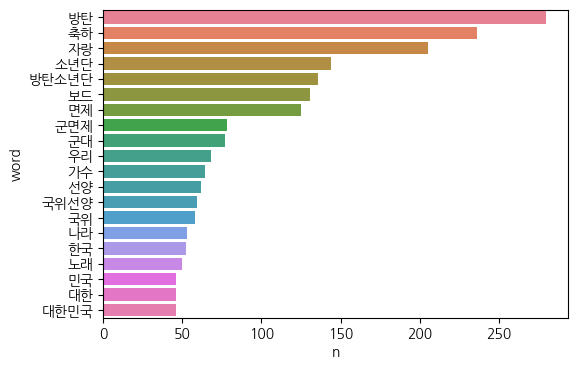

In [116]:
plt.figure(figsize=(6,4))
sns.barplot(data = top20, y = 'word', x = 'n', hue='word')

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
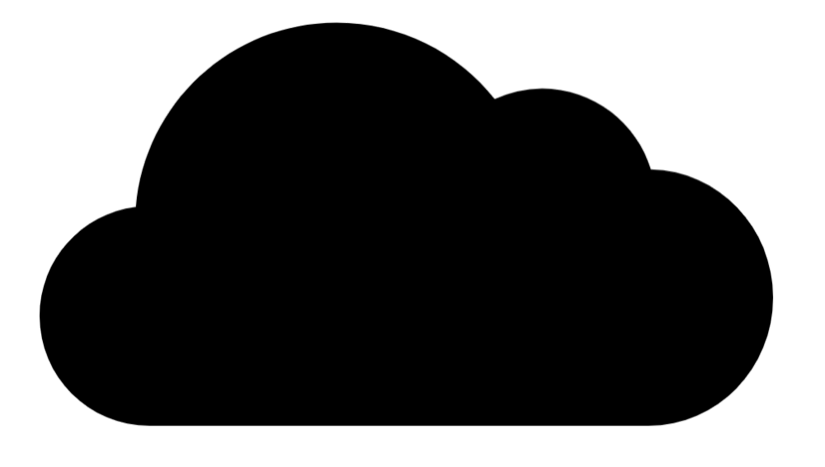

In [117]:
from PIL import Image
icon = Image.open('data/cloud.png')

img = Image.new('RGB', icon.size, (255,255,255))
img.paste(icon, icon)

img = np.array(img)
img

In [118]:
df_word.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2168 entries, 752 to 2144
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   word    2168 non-null   object
 1   n       2168 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 50.8+ KB


In [119]:
df_word.sample(5)

,word,n
1740,줄아시,1
367,년만,3
989,선정적,1
1972,특수기간,1
8,가보,2


In [120]:
dic_word = df_word.set_index('word').to_dict()['n']
dic_word

{'방탄': 280,
 '축하': 236,
 '자랑': 205,
 '소년단': 144,
 '방탄소년단': 136,
 '보드': 131,
 '면제': 125,
 '군면제': 78,
 '군대': 77,
 '우리': 68,
 '가수': 64,
 '선양': 62,
 '국위선양': 59,
 '국위': 58,
 '나라': 53,
 '한국': 52,
 '노래': 50,
 '민국': 46,
 '대한': 46,
 '대한민국': 46,
 '진짜': 43,
 '최고': 40,
 '대박': 39,
 '세계': 36,
 '아미': 35,
 '소식': 31,
 '시기': 30,
 '생각': 30,
 '사람': 29,
 '정국': 29,
 '행복': 29,
 '라니': 29,
 '역사': 28,
 '사랑': 28,
 '코로나': 27,
 '차트': 27,
 '생일': 27,
 '핫백': 26,
 '감사': 24,
 '위라니': 24,
 '우리나라': 23,
 '축하해': 23,
 '미국': 22,
 '이것': 22,
 '전세계': 22,
 '싱글': 22,
 '인정': 22,
 '그룹': 22,
 '진심': 22,
 '정도': 22,
 '노력': 21,
 '응원': 20,
 '활동': 19,
 '음악': 19,
 '요즘': 19,
 '고생': 18,
 '최초': 17,
 '아이': 17,
 '올림픽': 15,
 '너희': 15,
 '문화': 15,
 '이제': 15,
 '국민': 15,
 '때문': 15,
 '국가': 15,
 '뉴스': 15,
 '기사': 14,
 '수고': 14,
 '숟가락': 14,
 '내가': 14,
 '대통령': 14,
 '멤버': 14,
 '기분': 14,
 '시국': 13,
 '아티스트': 13,
 '이름': 13,
 '한국인': 13,
 '눈물': 13,
 '지금': 12,
 '마이트': 12,
 '아시아': 12,
 '금메달': 12,
 '댓글': 12,
 '친구': 11,
 '남자': 11,
 '국뽕': 11,
 '기록': 11,
 '싱글차트': 11,

In [121]:
dic_word = df_word.set_index('word').to_dict()['n']

In [123]:
from wordcloud import WordCloud

In [154]:
font = 'DoHyeon-Regular.ttf'

In [148]:
FONT_PATH = "/usr/share/fonts/truetype/nanum/NanumGothic.ttf"

In [151]:
!find / -name NanumGothic.ttf

/usr/local/lib/python3.11/dist-packages/koreanize_matplotlib/fonts/NanumGothic.ttf
find: ‘/proc/68/task/68/net’: Invalid argument
find: ‘/proc/68/net’: Invalid argument


In [158]:
!apt-get install fonts-nanum*

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
Note, selecting 'fonts-nanum-extra' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-coding' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum-eco' for glob 'fonts-nanum*'
Note, selecting 'fonts-nanum' for glob 'fonts-nanum*'
The following NEW packages will be installed:
  fonts-nanum fonts-nanum-coding fonts-nanum-eco fonts-nanum-extra
0 upgraded, 4 newly installed, 0 to remove and 35 not upgraded.
Need to get 46.0 MB of archives.
After this operation, 177 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-coding all 2.5-3 [4,988 B]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-eco all 1.000-7 [14.7 MB]
Get:4 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum-extra all 20200506-1 [21.0

In [159]:
import matplotlib.pyplot as plt
plt.rcParams.update({'figure.dpi' : '300'})
%config InlineBackend.figure_format = 'retina'

In [162]:
wc = WordCloud(random_state = 1234,
               font_path = FONT_PATH,
               width = 400,
               height = 400,
               background_color = 'white',
               mask = img)

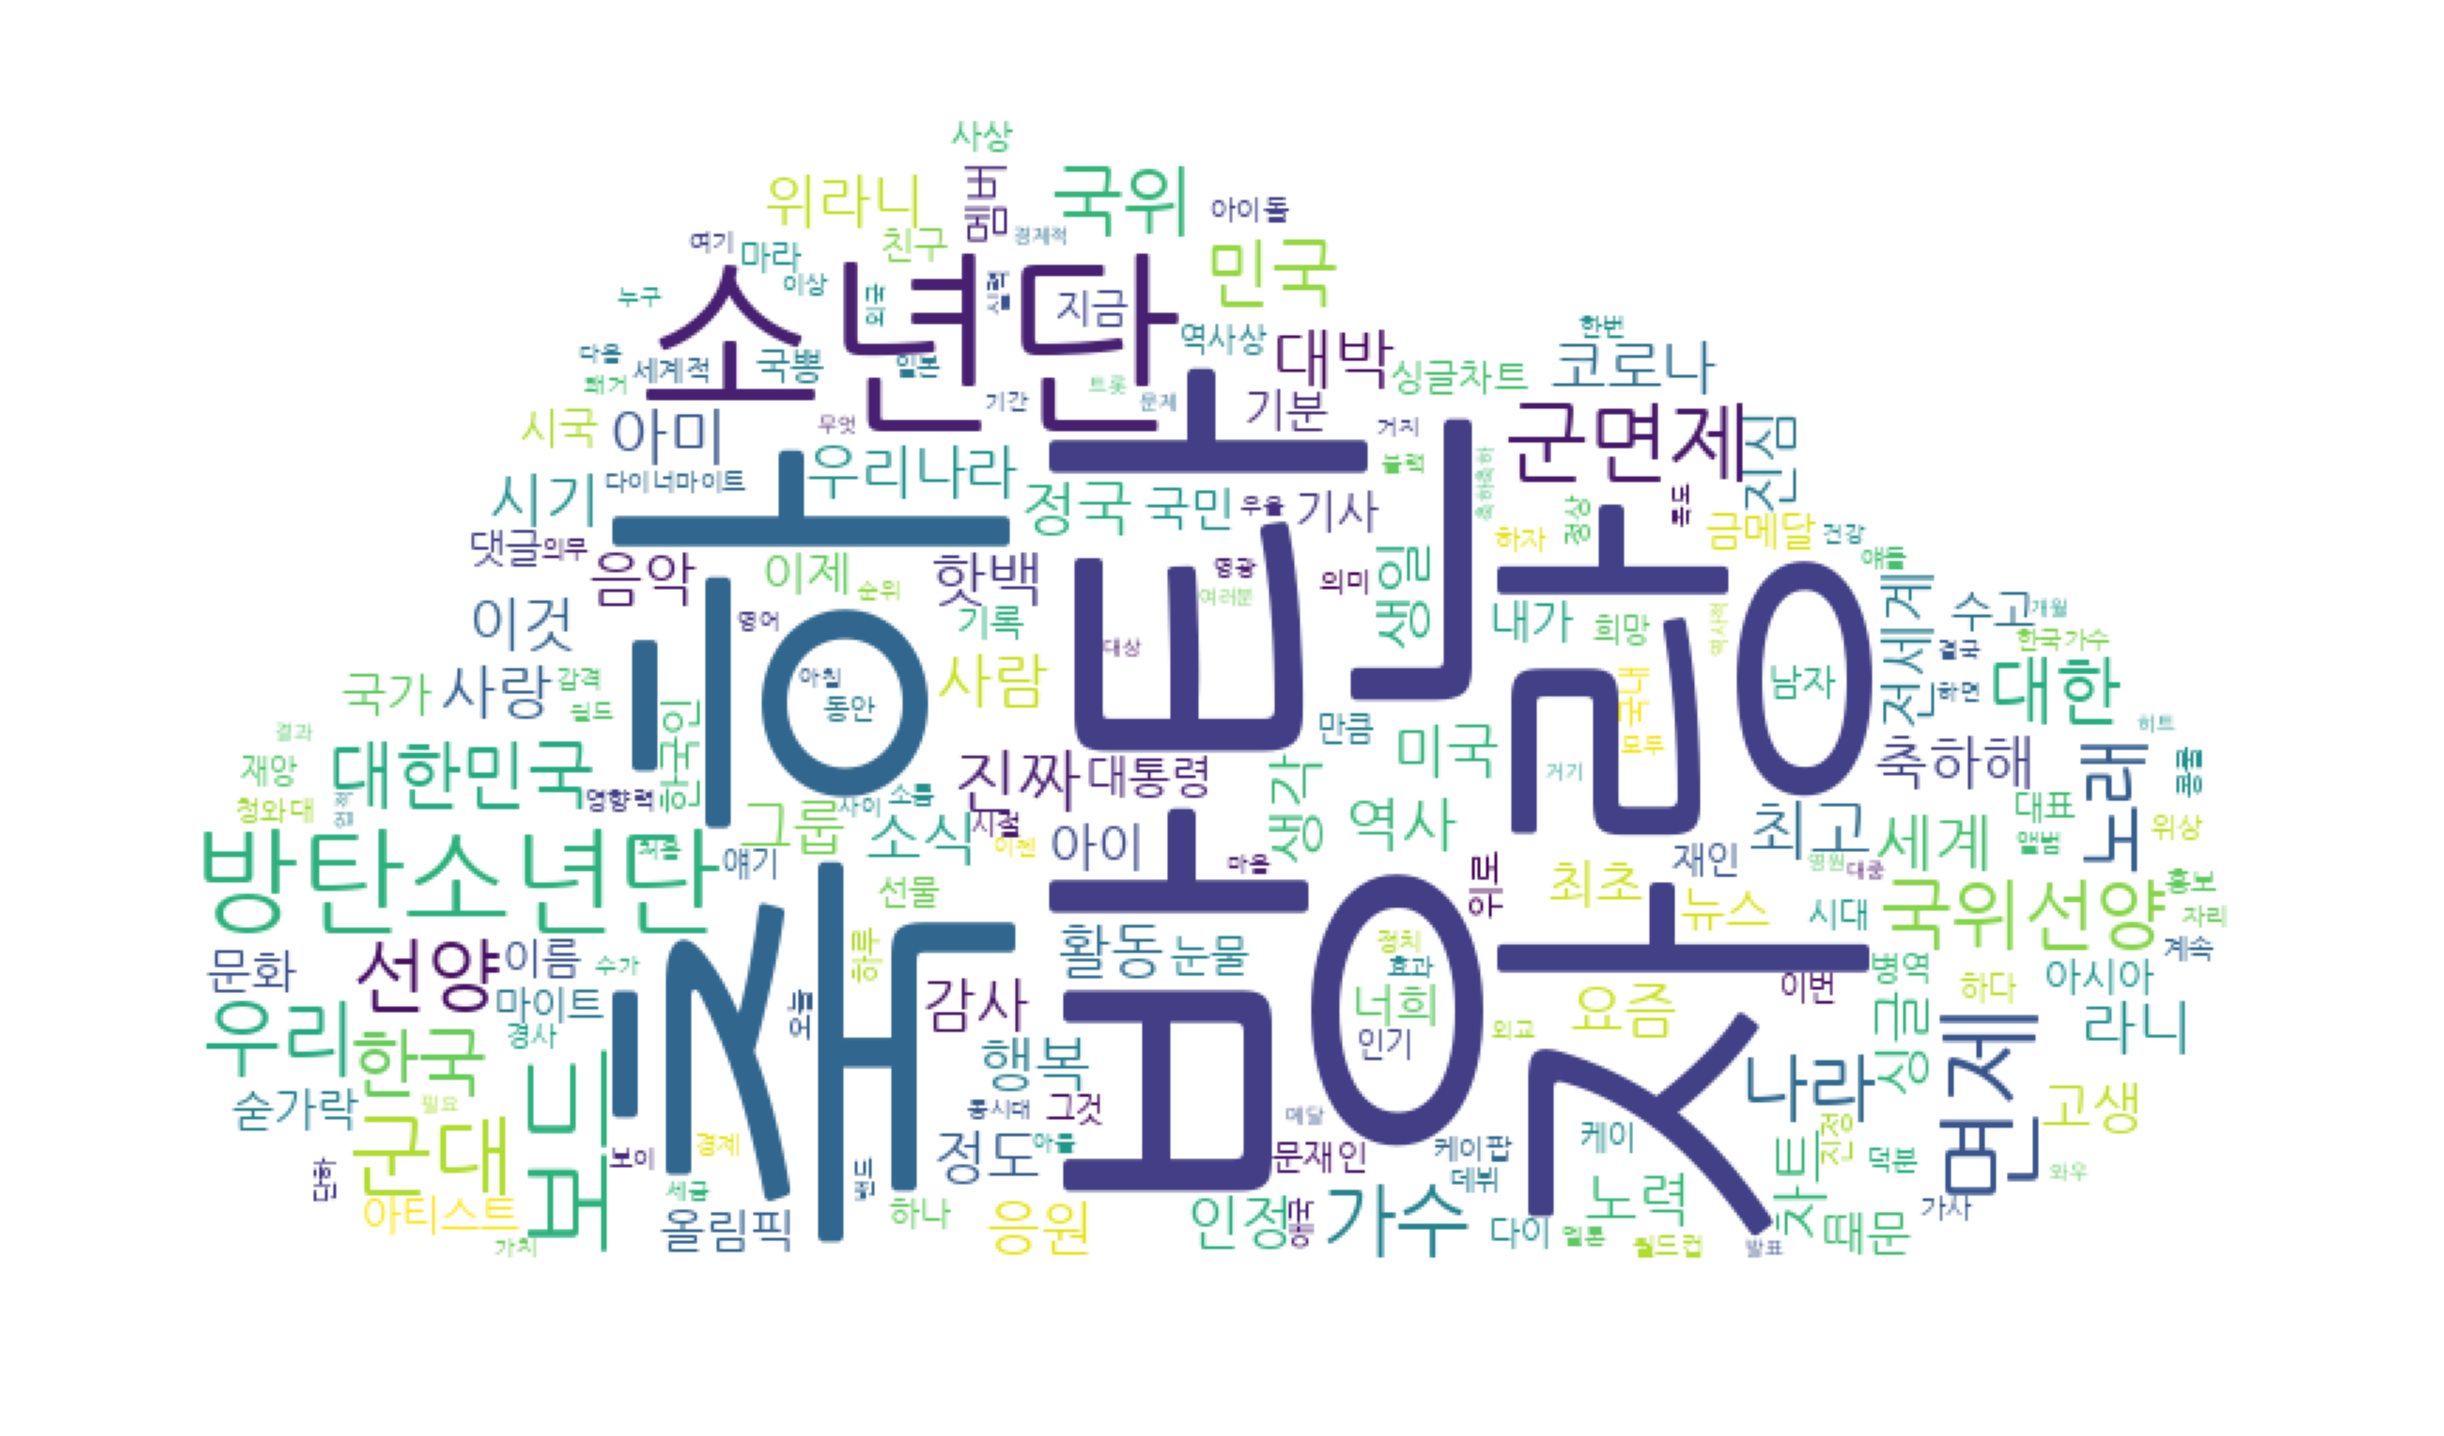

In [164]:
imgWC = wc.generate_from_frequencies(dic_word)
plt.figure(figsize = (5,3))
plt.axis('off')
plt.imshow(imgWC)

## 기말고사 예상

In [165]:
import pandas as pd

df = pd.DataFrame({
    'A': [1, 2, 3],
    'B': [10, 20, 30]
})
df

,A,B
0,1,10
1,2,20
2,3,30


In [166]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=0))

A     2
B    20
dtype: int64


In [167]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min()))

A     2
B    20
dtype: int64


In [168]:
# 각 열의 최대값에서 최소값을 뺀 결과
print(df.apply(lambda x: x.max() - x.min(), axis=1))

0     9
1    18
2    27
dtype: int64


In [170]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [171]:
f = lambda x: x + 5
df.apply(f)

,A,B
0,6,15
1,7,25
2,8,35


In [172]:
f = lambda x: x * 5
df.apply(f, axis=1)

,A,B
0,5,50
1,10,100
2,15,150


In [173]:
f = lambda x: x / 5
df.apply(f, axis=1)

,A,B
0,0.2,2.0
1,0.4,4.0
2,0.6,6.0


In [174]:
# 각 행의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=1))

0     5.5
1    11.0
2    16.5
dtype: float64


In [175]:
# 각 열의 평균 구하기
print(df.apply(lambda x: x.mean(), axis=0))

A     2.0
B    20.0
dtype: float64


In [177]:
df

,A,B
0,1,10
1,2,20
2,3,30


In [178]:
df.apply(lambda x: x.sum(), axis=0)

,0
A,6
B,60


In [179]:
df.apply(sum, axis=0)

,0
A,6
B,60


In [180]:
df.apply(sum, axis=1)

,0
0,11
1,22
2,33


In [181]:
df.sum(axis=0)

,0
A,6
B,60


In [182]:
df.sum(axis=1)

,0
0,11
1,22
2,33


In [183]:
import pandas as pd

df = pd.DataFrame({
    'name': ['Alice', 'Bob'],
    'hobbies': [['reading', 'cooking'], ['gaming']]
})
df

,name,hobbies
0,Alice,"[reading, cooking]"
1,Bob,[gaming]


In [184]:
# explode 적용
df_exploded = df.explode('hobbies')
df_exploded


,name,hobbies
0,Alice,reading
0,Alice,cooking
1,Bob,gaming


In [185]:

from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + ' '*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

In [186]:
# 여러 열을 동시에 explode (Pandas 1.3.0 이상)
df = pd.DataFrame({
    'A': [[1, 2], [3]],
    'B': [['a', 'b'], ['c']]
})
df

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]


In [187]:
display_side_by_side(df, df.explode(['A']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,"[a, b]"
0,2,"[a, b]"
1,3,[c]


In [188]:
display_side_by_side(df, df.explode(['B']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,"[1, 2]",a
0,"[1, 2]",b
1,[3],c


In [189]:
display_side_by_side(df, df.explode(['A', 'B']))

,A,B
0,"[1, 2]","[a, b]"
1,[3],[c]
,A,B
0,1,a
0,2,b
1,3,c


## 종료